## 다중 클래스 분류
- y의 카테고리 클래스가 3개 이상이다?!
- 다음과 같은 여러개의 binary class 문제로 바꾸어 해결한다,(trick을 쓴다)

### OvO(One-vs-One)
- 카테고리 내 클래스 리그전을 생각하면 된다.
- A, B, C 클래스로 되어있다면, (A,B) ,(B,C), (A,C)로 binary classification으로 변환
- 각 binary classification에서 선택된 클래스가 있을 텐데, 가장 많이 선택받은 클래스를 선택한다.

##### but 1,1,1로 스코어가 동점으로 나올 수 있다는 단점이 있음...그래서....

### OvR(One-vs-Rest)
- A vs 나머지, B vs 나머지, C vs 나머지로 문제를 해결
- 동점 상황이 나오면, 각 해당 클래스의 판별함수 값을 비교하여 큰값을 선택

In [1]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris()
model1 = LogisticRegression().fit(iris.data, iris.target)
model2 = OneVsRestClassifier(LogisticRegression()).fit(iris.data, iris.target)
model3 = OneVsOneClassifier(LogisticRegression()).fit(iris.data, iris.target)

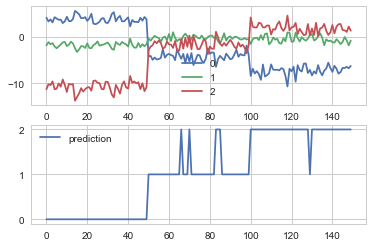

In [2]:
ax1 = plt.subplot(211)
pd.DataFrame(model1.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model1.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

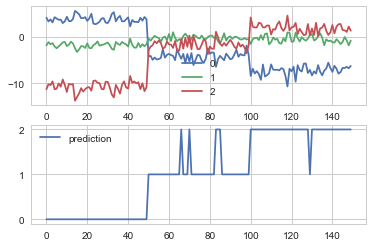

In [3]:
ax1 = plt.subplot(211)
pd.DataFrame(model2.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model2.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

똑같은 그래프가 2개인 이유는 로지스틱 회귀모형을 다중클래스에서도 사용할 수있다는 것을 보여주기 위함.

- 위 그래프에서 50~100사이를 보면 판별함수값이 모두 음수가 나온 것을 볼 수 있음.
- 이를 판단할땐 가장 위에있는 클래스(판별함수값이 가장 큰) 1번(B)클래스를 선택한다.

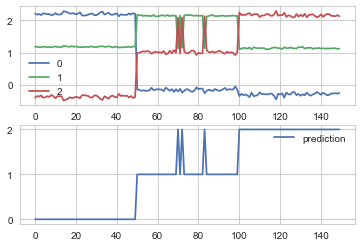

In [4]:
ax1 = plt.subplot(211)
pd.DataFrame(model3.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model3.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

이를 똑같이 OvO형태로 나타낸것이로 가장 위에 있는 선의 색깔(클래스)만 보면 된다.